In [16]:
import scanpy as sc
import numpy as np
from sklearn.model_selection import KFold
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score


In [2]:
latent = sc.read('./data/11_latent_moe.h5ad')
adata = sc.read('./data/09_tcr_annotation_A_B_with_gender_data.h5ad')

In [3]:
latent.uns['iroot'] = 36 #can comment this in and out

In [4]:
adata.uns['iroot'] = 36 #can comment this in and out

In [5]:
#sc.pp.neighbors(latent, n_neighbors=20, use_rep='X', method='gauss')
sc.pp.neighbors(latent, n_neighbors=5, method='gauss', knn=False)
sc.tl.diffmap(latent)
sc.tl.dpt(latent, n_branchings=1, n_dcs=10)

In [6]:
#sc.pp.neighbors(latent, n_neighbors=20, use_rep='X', method='gauss')
sc.pp.neighbors(adata, n_neighbors=5, method='gauss', knn=False)
sc.tl.diffmap(adata)
sc.tl.dpt(adata, n_branchings=1, n_dcs=10)

         Falling back to preprocessing with `sc.pp.pca` and default params.


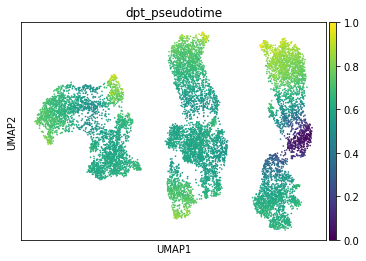

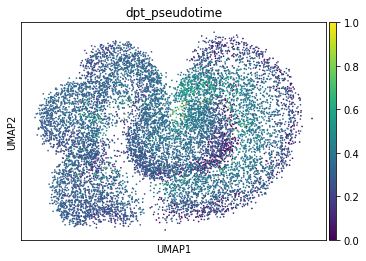

In [33]:
sc.pp.neighbors(latent, use_rep='X')
sc.pp.neighbors(adata, use_rep='X')
sc.tl.umap(latent)
sc.pl.umap(latent, color='dpt_pseudotime')
sc.tl.umap(adata)
sc.pl.umap(adata, color='dpt_pseudotime')

In [30]:
k = 10
kf = KFold(n_splits=k) 
model = LogisticRegression(solver = 'liblinear')
def results_cross_validation(X, y, score):
    X = X.reshape(-1,1)
    acc_score = []
    for train_index, test_index in kf.split(X):
        #print("TRAIN:", train_index, "TEST:", test_index)
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        model.fit(X_train, y_train)
        pred_values = model.predict(X_test)

        if score == 'accuracy_score':
            acc = accuracy_score(y_true = y_test, y_pred = pred_values)
        if score == 'f1_score':
            acc = f1_score(y_true = y_test, y_pred = pred_values, average='weighted')
        acc_score.append(acc)

    avg_acc_score = sum(acc_score)/k
    return(acc_score, avg_acc_score)


## Results with f1_score and newton_cg solver

In [29]:
le = LabelEncoder()
X = latent.obs['dpt_pseudotime'].to_numpy()
y = latent.obs['cell types'].to_numpy()
le.fit(y)
y = le.transform(y)
results1 = results_cross_validation(X,y, score = 'f1_score')
print("Results for the latent space:")
print(" ")
print('accuracy of each fold - {}'.format(results1[0]))
print('Avg accuracy : {}'.format(results1[1]))

X = adata.obs['dpt_pseudotime'].to_numpy()
y = adata.obs['cell types'].to_numpy()
le.fit(y)
y = le.transform(y)
results2 = results_cross_validation(X,y, score = 'f1_score')
print(" ")
print("Results for the adata space:")
print(" ")
print('accuracy of each fold - {}'.format(results2[0]))
print('Avg accuracy : {}'.format(results2[1]))


C:\Users\Gheorghe Pascu\anaconda3\envs\TCRproject\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Gheorghe Pascu\anaconda3\envs\TCRproject\lib\site-packages\sklearn\utils\optimize.py:204: UserWarning: Line Search failed
  warnings.warn('Line Search failed')
C:\Users\Gheorghe Pascu\anaconda3\envs\TCRproject\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Gheorghe Pascu\anaconda3\envs\TCRproject\lib\site-packages\sklearn\utils\optimize.py:204: UserWarning: Line Search failed
  warnings.warn('Line Search failed')
C:\Users\Gheorghe Pascu\anaconda3\envs\TCRproject\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search al

Results for the latent space:
 
accuracy of each fold - [0.18274758236423005, 0.1394734559693202, 0.1905225654942298, 0.2560711669691271, 0.25916766346650577, 0.16645220671449273, 0.08470593094982908, 0.05822158447025255, 0.06812847957845619, 0.05144510747085692]
Avg accuracy : 0.14569357434473001


C:\Users\Gheorghe Pascu\anaconda3\envs\TCRproject\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Gheorghe Pascu\anaconda3\envs\TCRproject\lib\site-packages\sklearn\utils\optimize.py:204: UserWarning: Line Search failed
  warnings.warn('Line Search failed')
C:\Users\Gheorghe Pascu\anaconda3\envs\TCRproject\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Gheorghe Pascu\anaconda3\envs\TCRproject\lib\site-packages\sklearn\utils\optimize.py:204: UserWarning: Line Search failed
  warnings.warn('Line Search failed')
C:\Users\Gheorghe Pascu\anaconda3\envs\TCRproject\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search al

 
Results for the adata space:
 
accuracy of each fold - [0.2870643741001236, 0.2454326223569326, 0.311123878426723, 0.4473268688533644, 0.38763562572290106, 0.2975193932304708, 0.2677899095891308, 0.13872108547353926, 0.17729473972842158, 0.1468829344114332]
Avg accuracy : 0.27067914318930403


C:\Users\Gheorghe Pascu\anaconda3\envs\TCRproject\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Gheorghe Pascu\anaconda3\envs\TCRproject\lib\site-packages\sklearn\utils\optimize.py:204: UserWarning: Line Search failed
  warnings.warn('Line Search failed')


## Results with f1_score and liblinear solver

In [31]:
le = LabelEncoder()
X = latent.obs['dpt_pseudotime'].to_numpy()
y = latent.obs['cell types'].to_numpy()
le.fit(y)
y = le.transform(y)
results1 = results_cross_validation(X,y, score = 'f1_score')
print("Results for the latent space:")
print(" ")
print('accuracy of each fold - {}'.format(results1[0]))
print('Avg accuracy : {}'.format(results1[1]))

X = adata.obs['dpt_pseudotime'].to_numpy()
y = adata.obs['cell types'].to_numpy()
le.fit(y)
y = le.transform(y)
results2 = results_cross_validation(X,y, score = 'f1_score')
print(" ")
print("Results for the adata space:")
print(" ")
print('accuracy of each fold - {}'.format(results2[0]))
print('Avg accuracy : {}'.format(results2[1]))


Results for the latent space:
 
accuracy of each fold - [0.1813595441724227, 0.1352161230127067, 0.18865541603312277, 0.24777821238331368, 0.2447029720018293, 0.17950129173883603, 0.10463191001925044, 0.05827476049984859, 0.06318176959733494, 0.04501731807454009]
Avg accuracy : 0.14483193175332054
 
Results for the adata space:
 
accuracy of each fold - [0.24945440564777002, 0.20891393764018085, 0.27371995093705875, 0.39285797774380726, 0.309927487362194, 0.2421794973228326, 0.24972953597681868, 0.10523042580170672, 0.1457104145714286, 0.1132386744172356]
Avg accuracy : 0.22909623074210334


## Results with initial metric (accuracy_score)

In [28]:
le = LabelEncoder()
X = latent.obs['dpt_pseudotime'].to_numpy()
y = latent.obs['cell types'].to_numpy()
le.fit(y)
y = le.transform(y)
results1 = results_cross_validation(X,y, score = 'accuracy_score')
print("Results for the latent space:")
print(" ")
print('accuracy of each fold - {}'.format(results1[0]))
print('Avg accuracy : {}'.format(results1[1]))

X = adata.obs['dpt_pseudotime'].to_numpy()
y = adata.obs['cell types'].to_numpy()
le.fit(y)
y = le.transform(y)
results2 = results_cross_validation(X,y, score = 'accuracy_score')
print(" ")
print("Results for the adata space:")
print(" ")
print('accuracy of each fold - {}'.format(results2[0]))
print('Avg accuracy : {}'.format(results2[1]))


C:\Users\Gheorghe Pascu\anaconda3\envs\TCRproject\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Gheorghe Pascu\anaconda3\envs\TCRproject\lib\site-packages\sklearn\utils\optimize.py:204: UserWarning: Line Search failed
  warnings.warn('Line Search failed')
C:\Users\Gheorghe Pascu\anaconda3\envs\TCRproject\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Gheorghe Pascu\anaconda3\envs\TCRproject\lib\site-packages\sklearn\utils\optimize.py:204: UserWarning: Line Search failed
  warnings.warn('Line Search failed')
C:\Users\Gheorghe Pascu\anaconda3\envs\TCRproject\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search al

Results for the latent space:
 
accuracy of each fold - [0.33667883211678834, 0.2773722627737226, 0.333029197080292, 0.4005474452554745, 0.3908675799086758, 0.29954337899543376, 0.16621004566210046, 0.1589041095890411, 0.17077625570776256, 0.14337899543378996]
Avg accuracy : 0.26773081025230805


C:\Users\Gheorghe Pascu\anaconda3\envs\TCRproject\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Gheorghe Pascu\anaconda3\envs\TCRproject\lib\site-packages\sklearn\utils\optimize.py:204: UserWarning: Line Search failed
  warnings.warn('Line Search failed')
C:\Users\Gheorghe Pascu\anaconda3\envs\TCRproject\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Gheorghe Pascu\anaconda3\envs\TCRproject\lib\site-packages\sklearn\utils\optimize.py:204: UserWarning: Line Search failed
  warnings.warn('Line Search failed')
C:\Users\Gheorghe Pascu\anaconda3\envs\TCRproject\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search al

 
Results for the adata space:
 
accuracy of each fold - [0.4279197080291971, 0.3731751824817518, 0.4416058394160584, 0.5374087591240876, 0.4757990867579909, 0.382648401826484, 0.38995433789954337, 0.245662100456621, 0.26575342465753427, 0.24840182648401826]
Avg accuracy : 0.3788328667133287


C:\Users\Gheorghe Pascu\anaconda3\envs\TCRproject\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Gheorghe Pascu\anaconda3\envs\TCRproject\lib\site-packages\sklearn\utils\optimize.py:204: UserWarning: Line Search failed
  warnings.warn('Line Search failed')


In [ ]:
#SCRAP PAPER

# X = latent.obs['dpt_pseudotime'].to_numpy()
# X = X.reshape(-1,1)
# y = latent.obs['cell types'].to_numpy()
# le.fit(y)
# y = le.transform(y)
# k = 5
# kf = KFold(n_splits=k, random_state=None)
# model = LogisticRegression(solver = 'newton-cg')
# result = cross_val_score(model , X, y, cv = kf)
 
# print("Avg accuracy: {}".format(result.mean()))



# X = adata.obs['dpt_pseudotime'].to_numpy()
# X = X.reshape(-1,1)
# y = adata.obs['cell types'].to_numpy()
# le.fit(y)
# y = le.transform(y)
# k = 5
# kf = KFold(n_splits=k, random_state=None)
# model = LogisticRegression(solver = 'newton-cg')
# result = cross_val_score(model , X, y, cv = kf)
 
# print("Avg accuracy: {}".format(result.mean()))